# <span style="color:gray">ipyrad-analysis toolkit:</span> clade_weights

<h5><span style="color:red">(Reference only method)</span></h5>

The `clade_weights` tool is designed to analyze a **tree_table**, which can be generated using the `treeslider` ipyrad-analysis tool. This tool can quantify and generate plots of clade supports in sliding windows along the genome. This is similar to the TWISST software, for showing how different gene tree patterns vary along the genome. 


Key features:

1. 

### Required software

In [1]:
# conda install ipyrad -c bioconda
# conda install toyplot -c eaton-lab

In [54]:
import ipyrad.analysis as ipa
import toyplot

from ipyrad.analysis.clade_weights import *

### Short Tutorial:



#### Load the data

In [56]:
# the path to your CSV
data = "./analysis-treeslider/test.tree_table.csv"

In [57]:
# check scaffold idx (row) against scaffold names
self = ipa.clade_weights(
    data=data,
    name="test",
    workdir="analysis-clade_weights",
    imap={
        "SE": ["virg", "mini", "gemi"],
        "CA": ["sagr", "oleo"],
        "WE": ["bran", "fusi-N", "fusi-S"],
        #"REF": ["reference"],
    },
    minsupport=50,
)

#### The tree table
In the `treeslider` tool you have the option to collapse individuals from the same species or population into a single taxon using an `imap` dictionary. While that can be useful for reducing missing data or generating tree plots...

In [58]:
self.tree_table.head()

scaffold    start       end  sites  snps  samples  missing  \
0         2        0   2000000  13263   155        9      0.0   
1         2  2000000   4000000  10544   112        9      0.0   
2         2  4000000   6000000   5544    46        9      0.0   
3         2  6000000   8000000  12777   138        9      0.0   
4         2  8000000  10000000  14441   166        9      0.0   

                                                tree  
0  (sagr:0.00343708,(oleo:0.00266064,(mini:0.0020...  
1  (fusi-N:0.00441769,reference:0.0186764,((bran:...  
2  (virg:0.00297301,fusi-N:0.00243431,(oleo:0.003...  
3  (fusi-N:0.00283693,(bran:0.00363545,reference:...  
4  (bran:0.00446094,reference:0.0119105,(fusi-S:0...

In [60]:
self.run(auto=True, force=True)

Parallel connection | oud: 4 cores
[####################] 100% 0:00:07 | calculating tree weights 


In [59]:
toyplot.plot(
    self.clade_weights.rolling(5, win_type="boxcar", center=True).mean(), 
    height=300,
    opacity=0.7,
);

AttributeError: 'NoneType' object has no attribute 'rolling'

In [30]:
# make empty clade weights table
self.clade_weights = pd.DataFrame(
    {i: [0.] * self.tree_table.shape[0] for i in self.imap.keys()}
)

In [16]:
treelist = self.tree_table.tree[:10].tolist()
clades = self.imap
idx = 0

In [25]:
# iterate over trees
for tidx, tree in enumerate(treelist):

    # get tips for this subtree
    tree = toytree.tree(tree)
    tips = set(tree.get_tip_labels())        

    # iterate over clades to test
    for name, clade in clades.items():
        
        idx = 0
        tsum = 0
        
        iclade = tips.intersection(set(clade))
        isamp = itertools.combinations(iclade, 2)
        oclade = tips.difference(iclade)
        osamp = itertools.combinations(oclade, 2)

        # iterate over quartets
        for ipair in isamp:
            for opair in osamp:
                quartet = set(list(ipair) + list(opair))
                todrop = set(tree.get_tip_labels()) - quartet
                dt = tree.drop_tips(todrop)
                tsum += clade_true(dt.unroot(), iclade)
                idx += 1
                
        print(tips)

{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr', 'fusi-N', 'gemi', 'bran', 'mini', 'reference', 'fusi-S', 'oleo'}
{'virg', 'sagr',

In [18]:
clade_weights(treelist, clades, idx)

virg  mini  gemi
0   0.0   0.0   0.0
1   0.0   0.0   0.0
2   0.0   0.0   0.0
3   0.0   0.0   0.0
4   0.0   0.0   0.0
5   0.0   0.0   0.0
6   0.0   0.0   0.0
7   0.0   0.0   0.0
8   0.0   0.0   0.0
9   0.0   0.0   0.0

#### The tree table

In [5]:
weights.tree_table.head()

scaffold    start       end  sites  snps  samples  missing  \
0         2        0   2000000  13263   155        9      0.0   
1         2  2000000   4000000  10544   112        9      0.0   
2         2  4000000   6000000   5544    46        9      0.0   
3         2  6000000   8000000  12777   138        9      0.0   
4         2  8000000  10000000  14441   166        9      0.0   

                                                tree  
0  (sagr:0.00343708,(oleo:0.00266064,(mini:0.0020...  
1  (fusi-N:0.00441769,reference:0.0186764,((bran:...  
2  (virg:0.00297301,fusi-N:0.00243431,(oleo:0.003...  
3  (fusi-N:0.00283693,(bran:0.00363545,reference:...  
4  (bran:0.00446094,reference:0.0119105,(fusi-S:0...

In [6]:
weights.run(auto=True)

Parallel connection | oud: 4 cores
[####################] 100% 0:00:02 | calculating tree weights 


In [8]:
weights.clade_weights

virg  mini  gemi
0    0.0   0.0   0.0
1    0.0   0.0   0.0
2    0.0   0.0   0.0
3    0.0   0.0   0.0
4    0.0   0.0   0.0
5    0.0   0.0   0.0
6    0.0   0.0   0.0
7    0.0   0.0   0.0
8    0.0   0.0   0.0
9    0.0   0.0   0.0
10   0.0   0.0   0.0
11   0.0   0.0   0.0
12   0.0   0.0   0.0
13   0.0   0.0   0.0
14   0.0   0.0   0.0
15   0.0   0.0   0.0
16   0.0   0.0   0.0
17   0.0   0.0   0.0
18   0.0   0.0   0.0
19   0.0   0.0   0.0
20   0.0   0.0   0.0
21   0.0   0.0   0.0
22   0.0   0.0   0.0
23   0.0   0.0   0.0
24   0.0   0.0   0.0
25   0.0   0.0   0.0
26   0.0   0.0   0.0
27   0.0   0.0   0.0

#### Enter window and slide arguments
Here I select the scaffold *Qrob_Chr03* (`scaffold_idx`=2), and run 2Mb windows (`window_size`) non-overlapping (2Mb `slide_size`) across the entire scaffold. I use the default inference method "raxml", and modify its default arguments to run 100 bootstrap replicates. More details on modifying raxml params later. I set for it to skip windows with <10 SNPs (`minsnps`), and to filter sites within windows (`mincov`) to only include those that have coverage across all 9 clades, with samples grouped into clades using an `imap` dictionary.

In [5]:
# select a scaffold idx, start, and end positions
ts = ipa.treeslider(
    name="test",
    data="/home/deren/Downloads/ref_pop2.seqs.hdf5",
    workdir="analysis-treeslider",
    scaffold_idxs=2,
    window_size=2000000,
    slide_size=2000000,
    inference_method="raxml",
    inference_args={"N": 100, "T": 4},
    minsnps=10,
    mincov=9,
    imap={
        "reference": ["reference"],
        "virg": ["TXWV2", "LALC2", "SCCU3", "FLSF33", "FLBA140"],
        "mini": ["FLSF47", "FLMO62", "FLSA185", "FLCK216"],
        "gemi": ["FLCK18", "FLSF54", "FLWO6", "FLAB109"],
        "bran": ["BJSL25", "BJSB3", "BJVL19"],
        "fusi-N": ["TXGR3", "TXMD3"],
        "fusi-S": ["MXED8", "MXGT4"],
        "sagr": ["CUVN10", "CUCA4", "CUSV6", "CUMM5"],
        "oleo": ["CRL0030", "HNDA09", "BZBB1", "MXSA3017", "CRL0001"],
    },
)

#### The tree inference command
You can examine the command that will be called on each genomic window. By modifying the `inference_args` above we can modify this string. See examples later in this tutorial.

In [6]:
# this is the tree inference command that will be used
ts.show_inference_command()

raxmlHPC-PTHREADS-SSE3 -f a -T 2 -m GTRGAMMA -n ... -w ... -s ... -p 54321 -N 100 -x 12345


#### Run tree inference jobs in parallel 
To run the command on every window across all available cores call the `.run()` command. This will automatically save checkpoints to a file of the tree_table as it runs, and can be restarted later if it interrupted.

In [7]:
ts.run(auto=True, force=True)

Parallel connection | oud: 4 cores
building database: nwindows=28; minsnps=10
[####################] 100% 0:01:35 | inferring trees 


#### The tree table
Our goal is to fill the `.tree_table`, a pandas DataFrame where rows are genomic windows and the information content of each window is recorded, and a newick string tree is inferred and filled in for each. The tree table is also saved as a CSV formatted file in the workdir. You can re-load it later using Pandas. Below I demonstrate how to plot results from the tree_able. To examine how phylogenetic relationships vary across the genome see also the `clade_weights()` tool, which takes the tree_table as input. 

In [8]:
# the tree table is automatically saved to disk as a CSV during .run()
ts.tree_table.head()

scaffold    start       end  sites  snps  samples  missing  \
0         2        0   2000000  13263   155        9      0.0   
1         2  2000000   4000000  10544   112        9      0.0   
2         2  4000000   6000000   5544    46        9      0.0   
3         2  6000000   8000000  12777   138        9      0.0   
4         2  8000000  10000000  14441   166        9      0.0   

                                                tree  
0  (sagr:0.00343708,(oleo:0.00266064,(mini:0.0020...  
1  (fusi-N:0.00441769,reference:0.0186764,((bran:...  
2  (virg:0.00297301,fusi-N:0.00243431,(oleo:0.003...  
3  (fusi-N:0.00283693,(bran:0.00363545,reference:...  
4  (bran:0.00446094,reference:0.0119105,(fusi-S:0...

<h3><span style="color:red">Advanced</span>: Plots tree results </h3>

#### Examine multiple trees

You can select trees from the .tree column of the tree_table and plot them one by one using toytree, or any other tree drawing tool. Below I use toytree to draw a grid of the first 12 trees. 

In [9]:
# filter to only windows with >50 SNPS
trees = ts.tree_table[ts.tree_table.snps > 50].tree.tolist()

# load all trees into a multitree object
mtre = toytree.mtree(trees)

# root trees and collapse nodes with <50 bootstrap support
mtre.treelist = [
    i.root("reference").collapse_nodes(min_support=50)
    for i in mtre.treelist
]

# draw the first 12 trees in a grid
mtre.draw_tree_grid(
    nrows=3, ncols=4, start=0,
    tip_labels_align=True,
    tip_labels_style={"font-size": "9px"},
);

<svg class="toyplot-canvas-Canvas" height="750.0px" id="t3d0a86d84d8c4f5398baf7949cefcb85" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 700.0 750.0" width="700.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> virg gemi mini oleo sagr fusi-S fusi-N bran reference mini virg gemi oleo sagr fusi-S bran fusi-N reference mini gemi virg sagr oleo fusi-S fusi-N bran reference sagr oleo fusi-N virg mini gemi fusi-S bran reference fusi-S fusi-N bran virg sagr oleo mini gemi reference oleo sagr fusi-N fusi-S bran virg gemi mini reference mini gemi virg fusi-S bran fusi-N oleo sagr reference fusi-N bran mini virg fusi-S gemi oleo sagr reference virg gemi mini sagr fusi-S bran fusi-N oleo reference fusi-S fusi-N mini oleo sagr bran gemi virg reference <path d="M 205.0 647.472609561753 L 254.08294369699337 647.472609561753" style="fill:none;opacity:1;stro

#### Draw cloud tree
Using toytree you can easily draw a cloud tree of overlapping gene trees to visualize discordance. These typically look much better if you root the trees, order tips by their consensus tree order, and do not use edge lengths. See below for an example, and see the toytree documentation.

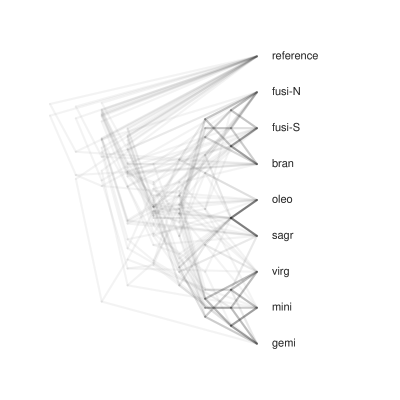

In [10]:
# filter to only windows with >50 SNPS (this could have been done in run)
trees = ts.tree_table[ts.tree_table.snps > 50].tree.tolist()

# load all trees into a multitree object
mtre = toytree.mtree(trees)

# root trees 
mtre.treelist = [i.root("reference") for i in mtre.treelist]

# infer a consensus tree to get best tip order
ctre = mtre.get_consensus_tree()

# draw the first 12 trees in a grid
mtre.draw_cloud_tree(
    width=400,
    height=400, 
    fixed_order=ctre.get_tip_labels(),
    use_edge_lengths=False,
);

<h3><span style="color:red">Advanced</span>: Modify the raxml command</h3>

In this analysis I entered multiple scaffolds to create windows across each scaffold. I also entered a smaller slide size than window size so that windows are partially overlapping. The raxml command string was modified to perform 10 full searches with no bootstraps. 

In [11]:
# select a scaffold idx, start, and end positions
ts = ipa.treeslider(
    name="chr1_w500K_s100K",
    data=data,
    workdir="analysis-treeslider",
    scaffold_idxs=[0, 1, 2],
    window_size=500000,
    slide_size=100000,
    minsnps=10,
    inference_method="raxml",
    inference_args={"m": "GTRCAT", "N": 10, "f": "d", 'x': None},
)

In [12]:
# this is the tree inference command that will be used
ts.show_inference_command()

raxmlHPC-PTHREADS-SSE3 -f d -T 2 -m GTRCAT -n ... -w ... -s ... -p 54321 -N 10
